<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-10 04:00:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.4MB/s    in 2.4s    

2025-09-10 04:00:41 (62.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



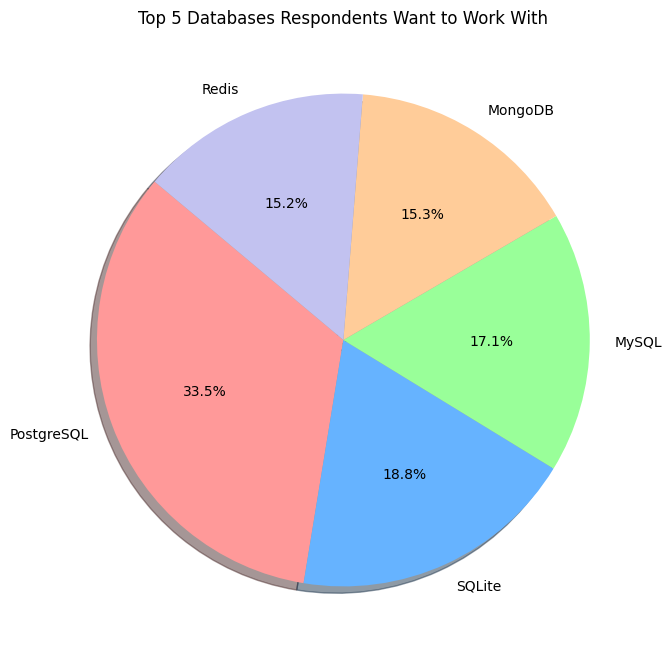

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant column and drop missing values
df_clean = df[['DatabaseWantToWorkWith']].dropna()

# Split multiple databases if needed (assuming semicolon-separated)
df_clean = df_clean.assign(Database=df_clean['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Count frequency of each database
db_counts = df_clean['Database'].value_counts()

# Select top 5 databases
top5_db = db_counts.head(5)
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_db, 
        labels=top5_db.index, 
        autopct='%1.1f%%',  # Show percentages
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



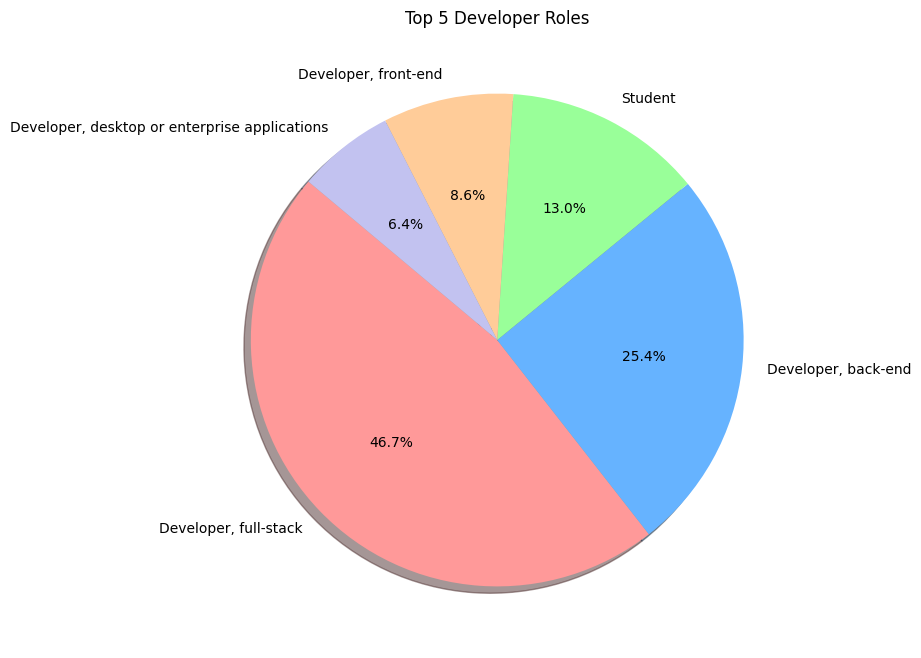

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep the relevant column and drop missing values
df_clean = df[['DevType']].dropna()

# Split multiple developer roles if needed (assuming semicolon-separated)
df_clean = df_clean.assign(DevRole=df_clean['DevType'].str.split(';')).explode('DevRole')

# Count frequency of each developer role
role_counts = df_clean['DevRole'].value_counts()

# Select top 5 roles
top5_roles = role_counts.head(5)
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_roles, 
        labels=top5_roles.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        shadow=True)

plt.title('Top 5 Developer Roles')
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Strip leading/trailing spaces
df.columns = df.columns.str.strip()

# Print all column names
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Keep only that column and drop missing values
df_clean = df[['OpSys_Professional']].dropna()

# Split multiple OS entries if semicolon-separated
df_clean = df_clean.assign(OS=df_clean['OpSys_Professional'].str.split(';')).explode('OS')

# Count frequency of each OS
os_counts = df_clean['OS'].value_counts()

# Select top 5 OS
top_os = os_counts.head(5)

# Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Top Operating Systems Used Professionally')
plt.show()


0: ResponseId
1: MainBranch
2: Age
3: Employment
4: RemoteWork
5: Check
6: CodingActivities
7: EdLevel
8: LearnCode
9: LearnCodeOnline
10: TechDoc
11: YearsCode
12: YearsCodePro
13: DevType
14: OrgSize
15: PurchaseInfluence
16: BuyNewTool
17: BuildvsBuy
18: TechEndorse
19: Country
20: Currency
21: CompTotal
22: LanguageHaveWorkedWith
23: LanguageWantToWorkWith
24: LanguageAdmired
25: DatabaseHaveWorkedWith
26: DatabaseWantToWorkWith
27: DatabaseAdmired
28: PlatformHaveWorkedWith
29: PlatformWantToWorkWith
30: PlatformAdmired
31: WebframeHaveWorkedWith
32: WebframeWantToWorkWith
33: WebframeAdmired
34: EmbeddedHaveWorkedWith
35: EmbeddedWantToWorkWith
36: EmbeddedAdmired
37: MiscTechHaveWorkedWith
38: MiscTechWantToWorkWith
39: MiscTechAdmired
40: ToolsTechHaveWorkedWith
41: ToolsTechWantToWorkWith
42: ToolsTechAdmired
43: NEWCollabToolsHaveWorkedWith
44: NEWCollabToolsWantToWorkWith
45: NEWCollabToolsAdmired
46: OpSysPersonal use
47: OpSysProfessional use
48: OfficeStackAsyncHaveWorked

KeyError: "None of [Index(['OpSys_Professional'], dtype='object')] are in the [columns]"

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



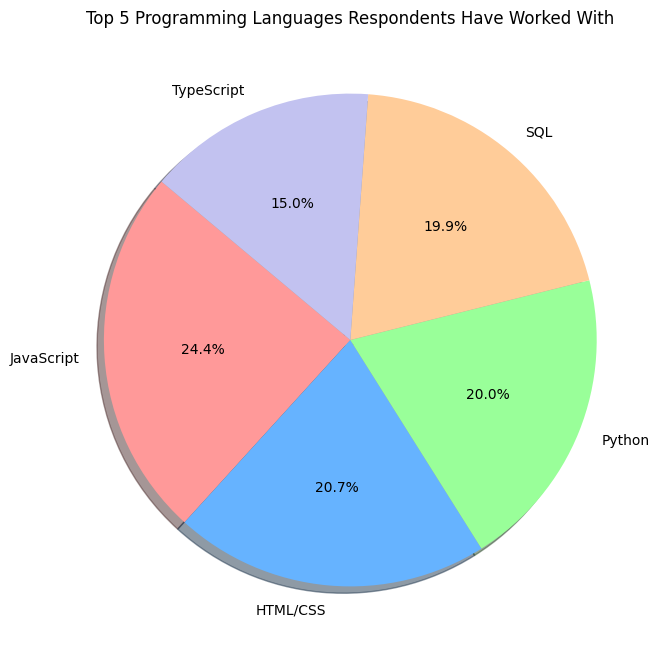

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant column and drop missing values
df_clean = df[['LanguageHaveWorkedWith']].dropna()

# Split multiple languages if semicolon-separated
df_clean = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count frequency of each language
language_counts = df_clean['Language'].value_counts()

# Select top 5 languages
top5_languages = language_counts.head(5)
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_languages, 
        labels=top5_languages.index, 
        autopct='%1.1f%%',  # Show percentages
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



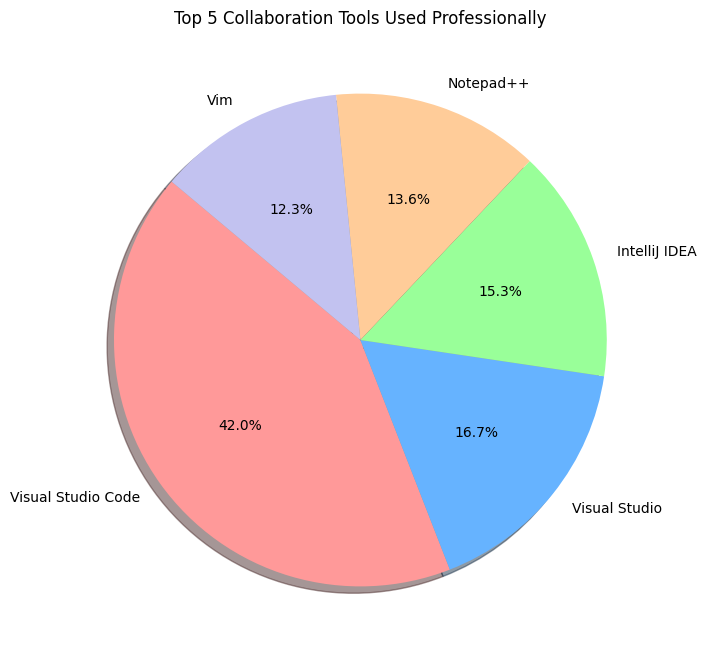

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant column and drop missing values
df_clean = df[['NEWCollabToolsHaveWorkedWith']].dropna()

# Split multiple tools if semicolon-separated
df_clean = df_clean.assign(Tool=df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Count frequency of each tool
tool_counts = df_clean['Tool'].value_counts()

# Select top 5 tools
top5_tools = tool_counts.head(5)
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_tools, 
        labels=top5_tools.index, 
        autopct='%1.1f%%',  # Show percentages
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Top 5 Collaboration Tools Used Professionally')
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



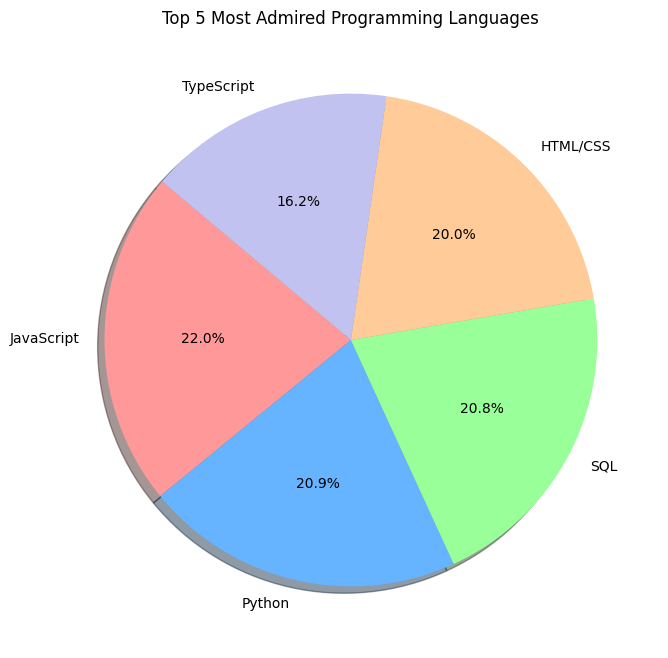

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant column and drop missing values
df_clean = df[['LanguageAdmired']].dropna()

# Split multiple languages if semicolon-separated
df_clean = df_clean.assign(Language=df_clean['LanguageAdmired'].str.split(';')).explode('Language')

# Count frequency of each language
language_counts = df_clean['Language'].value_counts()

# Select top 5 admired languages
top5_languages = language_counts.head(5)
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_languages, 
        labels=top5_languages.index, 
        autopct='%1.1f%%',  # Show percentages
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Top 5 Most Admired Programming Languages')
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [ ]:
##Write your code here

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("survey-data.csv")

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print all column names
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Use the correct column and drop missing values
df_clean = df[['AI_Tools_CurrentlyUsing']].dropna()

# Split multiple tools if semicolon-separated
df_clean = df_clean.assign(Tool=df_clean['AI_Tools_CurrentlyUsing'].str.split(';')).explode('Tool')

# Count frequency
tool_counts = df_clean['Tool'].value_counts()

# Top 5 tools
top5_tools = tool_counts.head(5)

# Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(top5_tools, labels=top5_tools.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Top 5 AI Development Tools Currently Used')
plt.show()


0: ResponseId
1: MainBranch
2: Age
3: Employment
4: RemoteWork
5: Check
6: CodingActivities
7: EdLevel
8: LearnCode
9: LearnCodeOnline
10: TechDoc
11: YearsCode
12: YearsCodePro
13: DevType
14: OrgSize
15: PurchaseInfluence
16: BuyNewTool
17: BuildvsBuy
18: TechEndorse
19: Country
20: Currency
21: CompTotal
22: LanguageHaveWorkedWith
23: LanguageWantToWorkWith
24: LanguageAdmired
25: DatabaseHaveWorkedWith
26: DatabaseWantToWorkWith
27: DatabaseAdmired
28: PlatformHaveWorkedWith
29: PlatformWantToWorkWith
30: PlatformAdmired
31: WebframeHaveWorkedWith
32: WebframeWantToWorkWith
33: WebframeAdmired
34: EmbeddedHaveWorkedWith
35: EmbeddedWantToWorkWith
36: EmbeddedAdmired
37: MiscTechHaveWorkedWith
38: MiscTechWantToWorkWith
39: MiscTechAdmired
40: ToolsTechHaveWorkedWith
41: ToolsTechWantToWorkWith
42: ToolsTechAdmired
43: NEWCollabToolsHaveWorkedWith
44: NEWCollabToolsWantToWorkWith
45: NEWCollabToolsAdmired
46: OpSysPersonal use
47: OpSysProfessional use
48: OfficeStackAsyncHaveWorked

KeyError: "None of [Index(['AI_Tools_CurrentlyUsing'], dtype='object')] are in the [columns]"

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



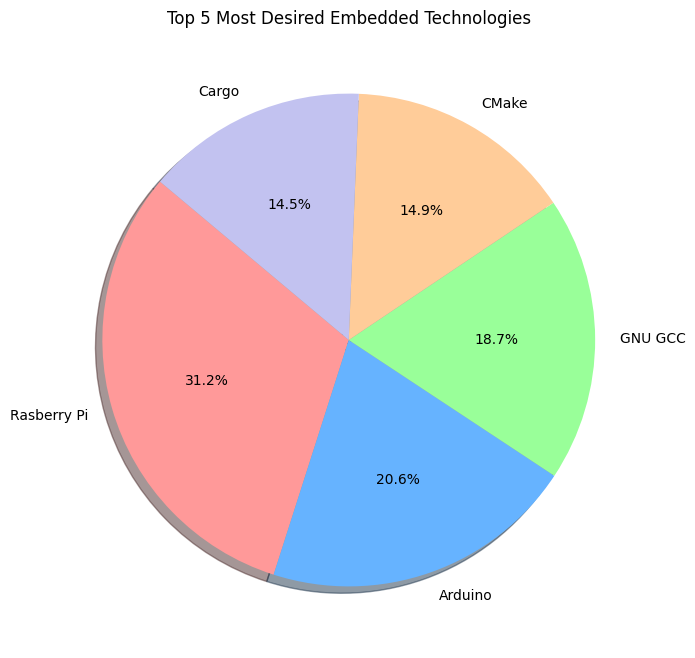

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant column and drop missing values
df_clean = df[['EmbeddedWantToWorkWith']].dropna()

# Split multiple technologies if semicolon-separated
df_clean = df_clean.assign(Tech=df_clean['EmbeddedWantToWorkWith'].str.split(';')).explode('Tech')

# Count frequency of each technology
tech_counts = df_clean['Tech'].value_counts()

# Select top 5 technologies
top5_tech = tech_counts.head(5)

plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Optional custom colors

plt.pie(top5_tech, 
        labels=top5_tech.index, 
        autopct='%1.1f%%',  # Show percentages
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Top 5 Most Desired Embedded Technologies')
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
